In [ ]:
!pip install deepchem
import deepchem as dc
dc.__version__

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 693.2/693.2 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 MB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 12.7 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.4
    Uninstalling scipy-1.11.4:
      Successfully uninstalled scipy-1.11.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
jax 0.4.23 requires scipy>=1.9, but you have scipy 1.8.1 which is incompatible.
jaxlib 0.4.23+cuda12.cudnn89 requires scipy>=1.9, but you have scipy 1.8.1 which is incompatible.


Instructions for updating:
experimental_relax_shapes is deprecated, use reduce_retracing instead


'2.7.1'

In [ ]:
!pip install rdkit

In [ ]:
!pip install mols2grid

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 10.7 MB/s eta 0:00:00


In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
from rdkit.Chem import rdDepictor
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG
import numpy as np

from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
from rdkit import Chem, DataStructs
from rdkit.Chem import (
    PandasTools,
    Draw,
    Descriptors,
    MACCSkeys,
    rdFingerprintGenerator,
)
import io
from google.colab import files
import mols2grid

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving tox21_Aromatase_curated.xlsx to tox21_Aromatase_curated.xlsx


In [ ]:
df2 = pd.read_excel('tox21_Aromatase_curated.xlsx')
df2 = df2.rename(columns={"Aromatase": "y", "smiles": "ids"})
df2["w"] = 1
df2

,y,mol_id,ids,num,w
0,0,TOX3020,CCN1C(=O)NC(c2ccccc2)C1=O,1,1
1,0,TOX3027,CCCN(CC)C(CC)C(=O)Nc1c(C)cccc1C,3,1
2,0,TOX3028,CC(O)(P(=O)(O)O)P(=O)(O)O,4,1
3,0,TOX5110,CC(C)(C)OOC(C)(C)CCC(C)(C)OOC(C)(C)C,5,1
4,0,TOX6619,O=S(=O)(Cl)c1ccccc1,6,1
...,...,...,...,...,...
5263,0,TOX25180,NC(=O)CN1CC(O)CC1=O,8005,1
5264,0,TOX25186,CCCn1c(=O)[nH]c(=O)c2[nH]cnc21,8007,1
5265,0,TOX25184,CCCNCC(O)COc1ccccc1C(=O)CCc1ccccc1,8008,1
5266,0,TOX2370,CC(=O)[C@H]1CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(...,8010,1


,y,mol_id,ids,num,w,ROMol
0,0,TOX3020,CCN1C(=O)NC(c2ccccc2)C1=O,1,1,
1,0,TOX3027,CCCN(CC)C(CC)C(=O)Nc1c(C)cccc1C,3,1,
2,0,TOX3028,CC(O)(P(=O)(O)O)P(=O)(O)O,4,1,
3,0,TOX5110,CC(C)(C)OOC(C)(C)CCC(C)(C)OOC(C)(C)C,5,1,
4,0,TOX6619,O=S(=O)(Cl)c1ccccc1,6,1,
...,...,...,...,...,...,...
5263,0,TOX25180,NC(=O)CN1CC(O)CC1=O,8005,1,
5264,0,TOX25186,CCCn1c(=O)[nH]c(=O)c2[nH]cnc21,8007,1,
5265,0,TOX25184,CCCNCC(O)COc1ccccc1C(=O)CCc1ccccc1,8008,1,
5266,0,TOX2370,CC(=O)[C@H]1CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(...,8010,1,

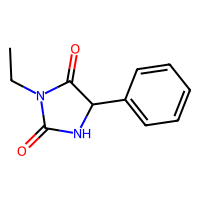
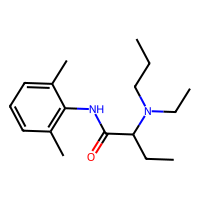
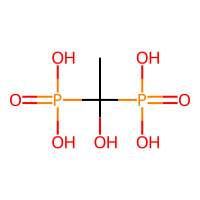
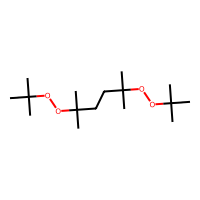
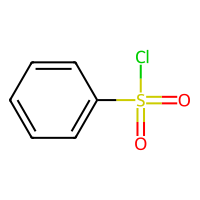
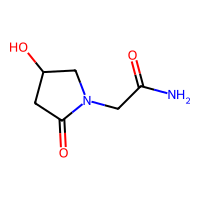
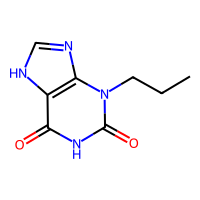
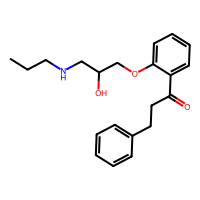
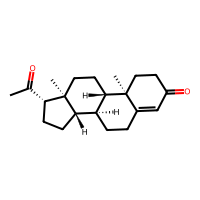
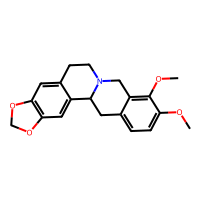

In [ ]:
PandasTools.AddMoleculeColumnToFrame(df2, smilesCol="ids")
df2

In [ ]:
ids_list = df2['ids'].values.tolist()
ids = df2['ids']
ids = pd.DataFrame(ids)
datapoints = len(ids_list)
featurizer = dc.feat.CircularFingerprint(size=1024)
#featurizer = dc.feat.ConvMolFeaturizer(datapoints)
features = featurizer.featurize(ids_list)
features = pd.DataFrame(features)
features_list = list(features.columns.values)
list_X = []
for i in range(1,len(features_list)+1):
#    list_X.append('X')
    list_X.append('X'+str(i))

features.set_axis(list_X, axis=1,inplace=True)
df_featurized2 = pd.concat([features, ids, df2.y, df2.w], axis=1, join='inner')
df_featurized2

<ipython-input-9-f0dafa6ba427>:15: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  features.set_axis(list_X, axis=1,inplace=True)


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X1018,X1019,X1020,X1021,X1022,X1023,X1024,ids,y,w
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,CCN1C(=O)NC(c2ccccc2)C1=O,0,1
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CCCN(CC)C(CC)C(=O)Nc1c(C)cccc1C,0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CC(O)(P(=O)(O)O)P(=O)(O)O,0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CC(C)(C)OOC(C)(C)CCC(C)(C)OOC(C)(C)C,0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,O=S(=O)(Cl)c1ccccc1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5263,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NC(=O)CN1CC(O)CC1=O,0,1
5264,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CCCn1c(=O)[nH]c(=O)c2[nH]cnc21,0,1
5265,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CCCNCC(O)COc1ccccc1C(=O)CCc1ccccc1,0,1
5266,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,CC(=O)[C@H]1CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(...,0,1


In [ ]:
df_featurized2['y'].value_counts()[0]

5014

In [ ]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class
df_majority = df_featurized2[(df_featurized2['y']==0)]
df_minority = df_featurized2[(df_featurized2['y']==1)]
# upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,    # sample with replacement
                                 n_samples= df_featurized2['y'].value_counts()[0], # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

In [ ]:
df_upsampled

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X1018,X1019,X1020,X1021,X1022,X1023,X1024,ids,y,w
2275,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Nc1cc(Cl)c(-c2cc(Cl)c(N)cc2Cl)cc1Cl,1,1
3642,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CC(C(=O)O)c1ccc(N2Cc3ccccc3C2=O)cc1,1,1
1975,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CCN(CC)C(=O)C(C)Oc1cccc2ccccc12,1,1
401,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CCCCC1(COC(=O)CCC(=O)O)C(=O)N(c2ccccc2)N(c2ccc...,1,1
2297,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5263,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NC(=O)CN1CC(O)CC1=O,0,1
5264,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CCCn1c(=O)[nH]c(=O)c2[nH]cnc21,0,1
5265,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CCCNCC(O)COc1ccccc1C(=O)CCc1ccccc1,0,1
5266,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,CC(=O)[C@H]1CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(...,0,1


In [ ]:
# Convertig dataframe concat into NumpyDataset object (datasetnp)
datasetnp = dc.data.NumpyDataset.from_dataframe(df_upsampled)

# Creating a RandomSplitter object and splitting into just only train and valid datasets
splitter = dc.splits.RandomSplitter()
train_dataset, valid_dataset, test_dataset = splitter.train_valid_test_split(datasetnp,frac_train = 0.8, frac_valid = 0.2, frac_test= 0.0)

In [ ]:
n_tasks = 1
n_features = train_dataset.X.shape[1]

In [ ]:
# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, KFold
from scipy.stats import randint
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, classification_report

In [ ]:
rf = RandomForestClassifier()
rf.fit(train_dataset.X,train_dataset.y.ravel())

RandomForestClassifier()

In [ ]:
y_pred = rf.predict(valid_dataset.X)

In [ ]:
accuracy = accuracy_score(valid_dataset.y, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.996011964107677


In [ ]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# cross validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf,
                                 param_distributions = param_dist,
                                 n_iter=100,
                                 cv=cv)

# Fit the random search object to the data
rand_search.fit(train_dataset.X,train_dataset.y.ravel())

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7d8862b99660>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7d884db42830>})

In [ ]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 19, 'n_estimators': 139}


In [ ]:
print(best_rf)

RandomForestClassifier(max_depth=19, n_estimators=139)


In [ ]:
d = rand_search.best_params_
metric = dc.metrics.Metric(
dc.metrics.roc_auc_score, np.mean, mode="classification")
import sklearn
from sklearn.ensemble import RandomForestClassifier

best_rf = sklearn.ensemble.RandomForestClassifier(n_estimators= d['n_estimators'],
                                                        max_depth=d['max_depth'])
model = dc.models.SklearnModel(best_rf)

In [ ]:
model.fit(train_dataset)
model.save()

In [ ]:
#save model
import pickle

with open("model.pkl", "wb") as f:
     pickle.dump(model, f)

#load model
with open("model.pkl", "rb") as f:
     model = pickle.load(f)

In [ ]:
#save model
import pickle

with open("best_rf.pkl", "wb") as f:
     pickle.dump(best_rf, f)

#load model
with open("best_rf.pkl", "rb") as f:
     best_rf = pickle.load(f)

In [ ]:
metric = dc.metrics.Metric(
dc.metrics.roc_auc_score, np.mean, mode="classification")

print("Evaluating model")
train_scores = model.evaluate(train_dataset, [metric])
valid_scores = model.evaluate(valid_dataset, [metric])
print("Train scores")
print(train_scores)
print("Validation scores")
print(valid_scores)

Evaluating model
Train scores
{'mean-roc_auc_score': 0.9980470342792584}
Validation scores
{'mean-roc_auc_score': 0.9970675477940008}


In [ ]:
print(best_rf)

RandomForestClassifier(max_depth=19, n_estimators=139)


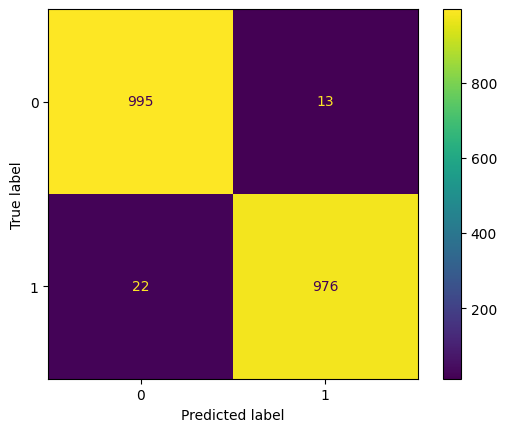

In [ ]:
# Generate predictions with the best model
y_pred = best_rf.predict(valid_dataset.X)

# Create the confusion matrix
cm = confusion_matrix(valid_dataset.y, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [ ]:
from sklearn.metrics import f1_score

y_pred = best_rf.predict(valid_dataset.X)

accuracy = accuracy_score(valid_dataset.y, y_pred)
precision = precision_score(valid_dataset.y, y_pred)
recall = recall_score(valid_dataset.y, y_pred)

precision_s = precision_score(valid_dataset.y, y_pred,average='micro')
recall_s    = recall_score(valid_dataset.y, y_pred, average='micro')

print("Accuracy     : ", accuracy)
print("Precision    : ", precision)
print("Recall       : ", recall)
print("F1_score     : ", 2*((precision_s*recall_s)/(precision_s + recall_s)))

Accuracy     :  0.9825523429710867
Precision    :  0.9868554095045501
Recall       :  0.9779559118236473
F1_score     :  0.9825523429710867


In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state = 1)
dt.fit(train_dataset.X, train_dataset.y)
y_pred = best_rf.predict(valid_dataset.X)
print("Accuracy score: " + str(accuracy_score(valid_dataset.y, y_pred)))
print("\nConfusion matrix: \n" + str(confusion_matrix(valid_dataset.y, y_pred)))
print("\nClassification report: \n" + str(classification_report(valid_dataset.y, y_pred)))

Accuracy score: 0.9825523429710867

Confusion matrix: 
[[995  13]
 [ 22 976]]

Classification report: 
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1008
           1       0.99      0.98      0.98       998

    accuracy                           0.98      2006
   macro avg       0.98      0.98      0.98      2006
weighted avg       0.98      0.98      0.98      2006



[Text(0.5, 0.875, 'x[356] <= 0.5\nentropy = 1.0\nsamples = 8022\nvalue = [4006, 4016]'),
 Text(0.25, 0.625, 'x[539] <= 0.5\nentropy = 0.613\nsamples = 1495\nvalue = [1269, 226]'),
 Text(0.125, 0.375, 'x[288] <= 0.5\nentropy = 0.558\nsamples = 1452\nvalue = [1263, 189]'),
 Text(0.0625, 0.125, 'entropy = 0.498\nsamples = 1410\nvalue = [1256, 154]'),
 Text(0.1875, 0.125, 'entropy = 0.65\nsamples = 42\nvalue = [7, 35]'),
 Text(0.375, 0.375, 'x[1019] <= 0.5\nentropy = 0.583\nsamples = 43\nvalue = [6, 37]'),
 Text(0.3125, 0.125, 'entropy = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.4375, 0.125, 'entropy = 0.176\nsamples = 38\nvalue = [1, 37]'),
 Text(0.75, 0.625, 'x[579] <= 0.5\nentropy = 0.981\nsamples = 6527\nvalue = [2737, 3790]'),
 Text(0.625, 0.375, 'x[36] <= 0.5\nentropy = 0.996\nsamples = 5720\nvalue = [2657, 3063]'),
 Text(0.5625, 0.125, 'entropy = 0.999\nsamples = 4456\nvalue = [2299, 2157]'),
 Text(0.6875, 0.125, 'entropy = 0.86\nsamples = 1264\nvalue = [358, 906]'),
 Text(0.875, 

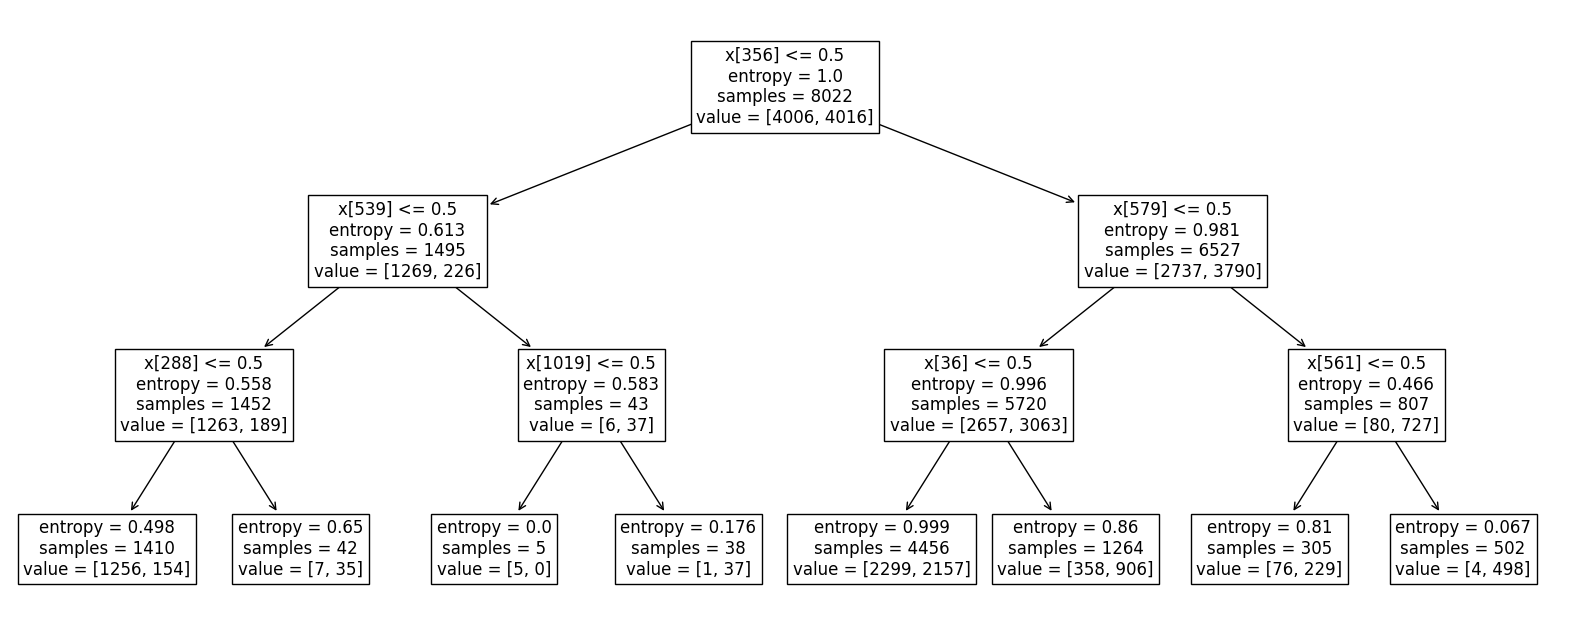

In [ ]:
fig = plt.subplots(figsize=(20, 8))
tree.plot_tree(dt, fontsize=12)

interactive(children=(IntSlider(value=1, description='max_depth:', max=6, min=1), Output()), _dom_classes=('wi…

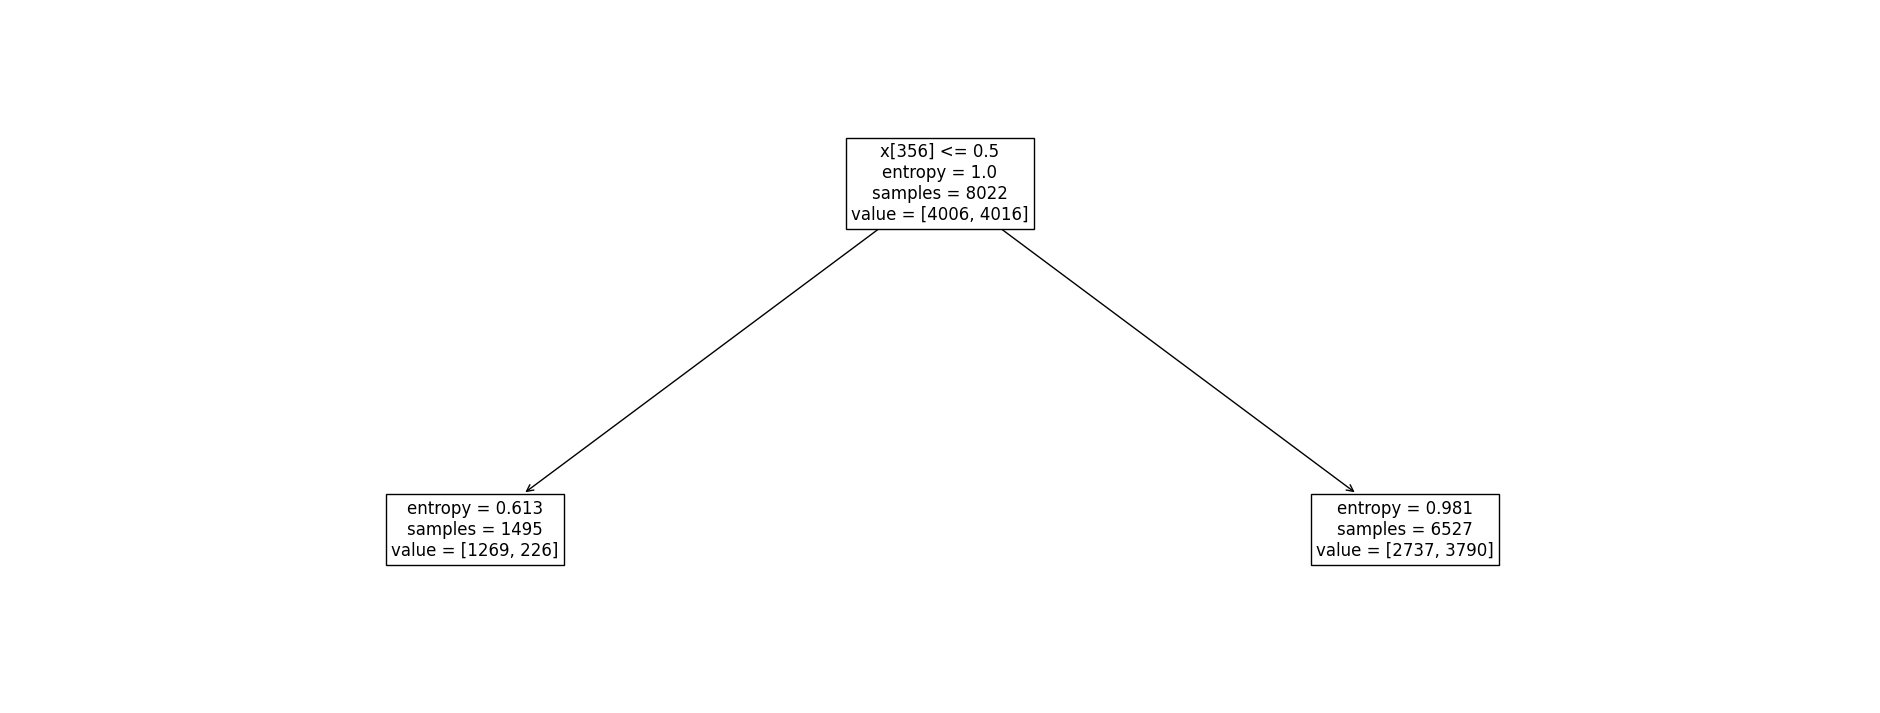

In [ ]:
import ipywidgets as widgets
from IPython.display import display
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

value_max_depth = widgets.IntSlider(value=1, min=1, max=6, step=1, description='max_depth:')

def DecisionTree(valor):
  dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = valor, random_state = 1)
  dt.fit(train_dataset.X, train_dataset.y)
  y_pred = best_rf.predict(valid_dataset.X)
  fig = plt.subplots(figsize=(20+4*valor, 8+valor))
  tree.plot_tree(dt, fontsize=12)


widgets.interact(DecisionTree , valor = value_max_depth);

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.fisher_exact.html#scipy.stats.fisher_exact

The p value, or probability value, is a statistical measurement used to validate a hypothesis against observed data. It tells you how likely it is that your data could have occurred under the null hypothesis. The level of statistical significance is often expressed as a p-value between 0 and 1. A p-value measures the probability of obtaining the observed results, assuming that the null hypothesis is true. The lower the p-value, the greater the statistical significance of the observed difference.

In [ ]:
from scipy.stats import hypergeom

table = cm
M = table.sum()
n = table[0].sum()
N = table[:, 0].sum()
start, end = hypergeom.support(M, n, N)
fisher = pd.DataFrame(hypergeom.pmf(np.arange(start, end+1), M, n, N), columns=['p-value'])
fisher

,p-value
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
985,0.0
986,0.0
987,0.0
988,0.0


In [ ]:
from scipy.stats import fisher_exact
pvalue = fisher_exact(table, alternative='two-sided')
pvalue[1]

0.0

##Explaining model (LIME)

In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=de7f5e68c8302e09d79057694e93ab2e2296fc8c3b6c30062f667ce76ebb5258
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
from lime import lime_tabular
feature_names = ["fp_%s"  % x for x in range(n_features)]
explainer = lime_tabular.LimeTabularExplainer(train_dataset.X,
                                              feature_names=feature_names,
                                              categorical_features=feature_names,
                                              class_names=['np', 'p'],
                                              discretize_continuous=True)

In [ ]:
#FUNÇÕES
# We need a function which takes a 2d numpy array (samples, features) and returns predictions (samples,)

def eval_model(my_model,i):
    def eval_closure(x):
        ds = dc.data.NumpyDataset(x, n_tasks=n_tasks)
        # The 0th task is NR-AR
        predictions = my_model.predict(ds)[:,i]
        return predictions
    return eval_closure

##################################
def fp_mol(mol, fp_length=n_features):
    """
    returns: dict of <int:list of string>
        dictionary mapping fingerprint index
        to list of SMILES strings that activated that fingerprint
    """
    d = {}
    feat = dc.feat.CircularFingerprint(sparse=True, smiles=True, size=n_features)
    retval = feat._featurize(mol)
    for k, v in retval.items():
        index = k % fp_length
        if index not in d:
            d[index] = set()
        d[index].add(v['smiles'])
    return d
#######################
def verifTox(l):
  somaTox = 0.0
  somaNao = 0.0

  for peso in l:
      if peso > 0:
        somaTox += peso
      else:
        somaNao += peso
  if abs(somaTox) > abs(somaNao):
    return ("YES",somaTox,somaNao)
  else:
    return ("NO",somaTox,somaNao)
#########################

In [ ]:
print(best_rf.predict_proba(valid_dataset.X)[:,1])

[0.20990909 0.13804104 0.40317595 ... 0.86959873 0.38873115 0.64336367]


In [ ]:
import statistics as st

dfAllFragMolPeso = pd.DataFrame()
dfAllMolTasksInfo = pd.DataFrame()
dfAllMolTox = pd.DataFrame()

for i in range(n_tasks):
    #model_fn = eval_model(best_rf,i)
    model_fn = lambda x: best_rf.predict_proba(x).astype(float)
    lista_active_id = np.where((valid_dataset.y[:,i] == 1) * (best_rf.predict_proba(valid_dataset.X)[:,1] > 0.8))[0] #list of molecules which are toxic and (*) are predicted as such by the model
    print('\nTASK:',i)
    print()

    #Dataframe that indicates if the molecule is toxic or not and how much is it(total)
    dfMolTox = pd.DataFrame(columns=["Task","Molecule Index","Molecule Id","Result","Penetrate","Non-Penetrate"])

    for active_id in lista_active_id:
      exp = explainer.explain_instance(valid_dataset.X[active_id], model_fn , num_features=100, top_labels=1)
      print('check', active_id)

      # What fragments activated what fingerprints in our active molecule?
      my_fragments = fp_mol(Chem.MolFromSmiles(valid_dataset.ids[active_id]))
      q = [key for key in exp.as_map().keys()][0]
      map = exp.as_map()[q]
      dic = dict(map)
      lista_pesos = []

      #Dataframe with molecule's information, its toxic fragments and weight
      dfFragMolPeso = pd.DataFrame(columns=["Task","Fingerprint","Fragment SMILES","Weight","Active Molecule"])

      for fp_index in my_fragments:
        if fp_index in dic:
          peso = dic[fp_index]
          frag = my_fragments[fp_index]
          lista_pesos.append(peso)

          if peso > 0: #Weight that positively contributes to toxicity
              dfFragMolPeso.loc[dfFragMolPeso.shape[0]] = [i,fp_index,frag, peso,active_id]#Adding a row at the bottom

      #Inserting data at dfMolTox
      vt = verifTox(lista_pesos) #variable that contains the sum of all of toxic fragments weight, non toxic fragment weight and the result of the molecule (if it's more toxic or not)
      smile = valid_dataset.select([active_id]).ids[0] #smile of the molecule in question
      dfMolTox.loc[dfMolTox.shape[0]] = [i,active_id,smile,vt[0],vt[1],vt[2]]
      dfAllMolTox = dfAllMolTox.append(dfMolTox)
      #dfAllMolTox = pd.concat([dfAllMolTox, dfMolTox])

      #Putting together all dfFragMolPeso
      if len(lista_pesos) != 0:
          #Selecting a minimum toxicity contribution (a minimum weight) to assess which fragments could be discarded. Setting a tolerance
          #tol = st.mean(lista_pesos) #weight's mean
          tol = 0.0
          dfFragMolPeso.drop(dfFragMolPeso.loc[dfFragMolPeso['Weight']<=tol].index,inplace=True) #dropping indexes which have less weight than the tol tolerance


          #Unsetting set object of column Fragment Smiles in dfFragMolPeso
          for (j,set_smiles) in enumerate(dfFragMolPeso['Fragment SMILES']): #el = set_smiles

              if  set_smiles == None or len(set_smiles) == 0:
                  dfFragMolPeso['Fragment SMILES'].iloc[j] = np.nan

              elif len(set_smiles) > 1: #If fp is activated by more than one fragment
                  k = j
                  for smi in set_smiles:
                    if smi != '': #Passing by possible bug (Empty smile)
                      if k == j: #Represents the first smile of the set of smiles
                          dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
                          k = dfFragMolPeso.shape[0] #From now on k will be always the index of the new adding row
                      else:
                          dfFragMolPeso.loc[k] = dfFragMolPeso.iloc[j] #copying data of original row (all the information, exept smile)
                          dfFragMolPeso['Fragment SMILES'].loc[k] = smi #modifying the fragment smile (which is still in set) to the smile alone (isolated) in the new position k
              else:
                  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]

          #Dropping possible bugs (empty smile)
          dfFragMolPeso.dropna(inplace=True)
          dfFragMolPeso.drop(dfFragMolPeso.loc[dfFragMolPeso['Fragment SMILES'].isin([''])].index,inplace=True)

          dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)
          #dfAllFragMolPeso = pd.concat([dfAllFragMolPeso, dfFragMolPeso])


    #Exporting data of the molecule's toxicity classification (dfMolTox)
    dfMolTox.to_excel('TASK'+str(i)+'-Classificacao das Moleculas.xlsx')
    files.download('TASK'+str(i)+'-Classificacao das Moleculas.xlsx')




TASK: 0

check 3


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 5


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 6


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 12


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 14


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 15


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 16


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 20


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 21


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 22


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 24


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-39-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 25


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 27


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 28


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 41


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 43


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 45


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 52


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-39-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 59


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 63


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 65


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 66


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 70


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 71


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 73


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 74


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 77


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-39-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].loc[k] = smi #modifying the fragment smile (which is still in set) to the smile alone (isolated) in the new position k
<ipython-input-39-d16b4006dbde>:72: SettingWithCo

check 78


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 79


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 80


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 84


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 87


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 88


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 90


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 93


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 95


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 98


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 105


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-39-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 106


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 115


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 117


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 121


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 123


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 125


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 128


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 129


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 140


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 144


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 147


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 150


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 154


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 159


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 160


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 162


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 163


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 165


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 166


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-39-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 167


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 168


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 173


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 174


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 179


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 180


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 187


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 190


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 194


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 197


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 206


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 211


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 215


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-39-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 216


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 221


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 222


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 225


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 228


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 229


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 232


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 233


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 237


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 238


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 242


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 243


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 246


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 251


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 256


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 257


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 260


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 261


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versi

check 262


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 263


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 268


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 270


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 271


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 274


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 279


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 280


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 283


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 299


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 302


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 303


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 304


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 308


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 315


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 320


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 321


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 325


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 330


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 331


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 332


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 336


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 338


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 342


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 344


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 346


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 348


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 349


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 350


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 351


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 352


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 353


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 356


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 358


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 364


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 378


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 383


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 384


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 391


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-39-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 392


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 395


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 398


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-39-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 399


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 401


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-39-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 404


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 405


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 408


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 411


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 414


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 415


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 417


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 418


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 423


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 425


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 426


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 429


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 430


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 435


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 438


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 444


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 446


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 449


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 450


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 451


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 454


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 457


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-39-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 462


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 467


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 468


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 471


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 472


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 473


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 475


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 476


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 480


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 487


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 491


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 498


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 501


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 504


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 507


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-39-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].loc[k] = smi #modifying the fragment smile (which is still in set) to the smile alone (isolated) in the new position k
<ipython-input-39-d16b4006dbde>:72: SettingWithCo

check 508


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 510


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 511


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 513


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 521


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 526


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 528


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 530


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 533


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 535


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 542


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 546


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 547


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 556


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 557


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 559


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 562


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 563


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 569


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 574


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-39-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 576


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 577


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 578


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 582


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-39-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 584


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 587


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 590


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 595


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 599


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 602


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 606


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-39-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 610


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 611


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 614


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 618


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 619


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 622


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 623


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-39-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 624


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 625


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 631


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 639


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 640


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 641


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 642


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 643


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 647


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 648


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 651


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 655


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 657


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 662


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 664


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 666


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 668


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 670


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 671


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 677


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 679


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 680


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 681


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 682


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 693


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 696


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 697


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 699


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-39-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 700


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 705


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 706


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 707


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 716


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 719


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-39-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 720


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 725


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 726


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 727


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 730


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 732


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 736


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 737


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 739


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 740


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 745


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 747


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 751


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 760


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 762


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 773


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 775


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 781


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-39-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 788


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 792


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 794


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 796


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 797


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 800


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 809


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 817


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 819


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 827


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 832


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 833


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 843


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 844


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 848


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-39-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].loc[k] = smi #modifying the fragment smile (which is still in set) to the smile alone (isolated) in the new position k
<ipython-input-39-d16b4006dbde>:72: SettingWithCo

check 853


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 855


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 862


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 865


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 866


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 867


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 868


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 871


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 874


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 876


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 878


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 881


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 883


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 884


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 885


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 886


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 887


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 891


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 897


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 899


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 900


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 904


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 908


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 911


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 912


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 913


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 917


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 922


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 924


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 926


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 929


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 939


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-39-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 940


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 942


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 947


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 953


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 956


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 957


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 958


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 962


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 965


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 970


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 971


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 973


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 985


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 990


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 994


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 997


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 998


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 999


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1007


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1009


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1013


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1014


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1020


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1021


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1023


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1026


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1031


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1033


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1034


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1036


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1038


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1039


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1040


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1042


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1044


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1045


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1053


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1057


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1058


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1059


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1066


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1067


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1071


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1072


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1078


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-39-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 1079


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-39-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 1080


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1081


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-39-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 1083


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1085


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1086


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1089


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1095


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1100


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-39-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 1101


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-39-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 1105


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1112


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1116


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1117


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1118


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-39-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 1120


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-39-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].loc[k] = smi #modifying the fragment smile (which is still in set) to the smile alone (isolated) in the new position k
<ipython-input-39-d16b4006dbde>:72: SettingWithCo

check 1123


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-39-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 1124


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1130


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1131


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1133


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1134


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1138


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1140


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1141


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1142


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1146


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1150


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1151


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1152


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1159


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1161


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1162


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1164


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1165


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1167


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1169


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1171


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1173


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1177


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1179


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1182


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1184


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1185


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1193


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1194


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1196


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1197


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1206


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1208


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1210


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1231


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1233


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1236


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1239


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1240


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1244


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1245


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1246


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1249


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1250


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-39-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 1251


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1252


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1255


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1258


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1263


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1264


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1268


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1273


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1287


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1288


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1293


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1294


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1298


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1299


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1304


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1308


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1310


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-39-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].loc[k] = smi #modifying the fragment smile (which is still in set) to the smile alone (isolated) in the new position k
<ipython-input-39-d16b4006dbde>:72: SettingWithCo

check 1311


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1313


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1319


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1321


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1327


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1334


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1336


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1337


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1339


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1345


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1346


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1349


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1354


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-39-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 1355


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1357


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1358


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1362


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1363


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1365


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1369


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1373


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1381


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1383


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1386


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1387


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1391


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1394


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1395


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1396


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1397


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1398


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1399


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1403


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1404


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1406


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1414


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-39-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 1421


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1423


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1424


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1432


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1433


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-39-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].loc[k] = smi #modifying the fragment smile (which is still in set) to the smile alone (isolated) in the new position k
<ipython-input-39-d16b4006dbde>:72: SettingWithCo

check 1434


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-39-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 1436


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1441


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1452


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1454


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1456


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1458


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1462


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1463


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1466


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1467


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1469


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1470


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1475


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1479


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-39-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 1482


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1488


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1490


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1491


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1494


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1501


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1502


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1503


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1504


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1505


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1509


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1511


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1515


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1523


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1526


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1530


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1539


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1542


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1545


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1551


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-39-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 1552


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1556


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-39-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].loc[k] = smi #modifying the fragment smile (which is still in set) to the smile alone (isolated) in the new position k
<ipython-input-39-d16b4006dbde>:72: SettingWithCo

check 1558


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1559


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1560


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1564


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1570


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-39-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 1575


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1578


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-39-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 1579


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1580


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1581


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1584


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1585


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1586


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versi

check 1589


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-39-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 1590


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1595


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1596


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1597


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1601


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1602


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1603


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1605


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1609


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1611


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1612


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1620


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1621


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1622


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1624


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1627


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1628


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1629


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1630


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1642


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1643


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1646


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1657


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1660


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1664


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1667


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1669


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-39-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 1672


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1676


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1680


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1682


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1686


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1687


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1688


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1689


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1694


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1695


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1704


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1706


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1711


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1713


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1714


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1718


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1723


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1725


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1731


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1733


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1735


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1737


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1740


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1741


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1745


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1751


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1753


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1757


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1758


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1759


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1760


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1764


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1765


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1766


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1767


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1769


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1773


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1777


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-39-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 1778


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1791


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1793


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1794


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1795


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1798


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-39-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 1799


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1803


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1807


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1809


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-39-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 1815


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1823


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1824


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1826


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1827


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1828


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1830


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-39-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].loc[k] = smi #modifying the fragment smile (which is still in set) to the smile alone (isolated) in the new position k
<ipython-input-39-d16b4006dbde>:72: SettingWithCo

check 1831


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1832


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1835


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1836


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-39-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 1838


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1841


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1844


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1845


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1846


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-39-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 1848


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1849


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1856


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1859


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1860


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-39-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 1867


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1870


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1871


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1874


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-39-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].loc[k] = smi #modifying the fragment smile (which is still in set) to the smile alone (isolated) in the new position k
<ipython-input-39-d16b4006dbde>:72: SettingWithCo

check 1877


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-39-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 1881


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1885


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1886


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versi

check 1887


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1888


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1893


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1895


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1896


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1909


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1913


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1914


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1915


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1916


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1917


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1920


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1925


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1927


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1930


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1935


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1940


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1942


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1944


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1960


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1967


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1969


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1970


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1972


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1976


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1979


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1980


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1982


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1986


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-39-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 1988


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1991


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1992


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1995


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1999


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 2003


<ipython-input-39-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-39-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-39-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [40]:
print(lista_active_id)

[   3    5    6   12   14   15   16   20   21   22   24   25   27   28
   41   43   45   52   59   63   65   66   70   71   73   74   77   78
   79   80   84   87   88   90   93   95   98  105  106  115  117  121
  123  125  128  129  140  144  147  150  154  159  160  162  163  165
  166  167  168  173  174  179  180  187  190  194  197  206  211  215
  216  221  222  225  228  229  232  233  237  238  242  243  246  251
  256  257  260  261  262  263  268  270  271  274  279  280  283  299
  302  303  304  308  315  320  321  325  330  331  332  336  338  342
  344  346  348  349  350  351  352  353  356  358  364  378  383  384
  391  392  395  398  399  401  404  405  408  411  414  415  417  418
  423  425  426  429  430  435  438  444  446  449  450  451  454  457
  462  467  468  471  472  473  475  476  480  487  491  498  501  504
  507  508  510  511  513  521  526  528  530  533  535  542  546  547
  556  557  559  562  563  569  574  576  577  578  582  584  587  590
  595 

In [41]:
#Setting task as index
dfAllFragMolPeso.set_index('Task',inplace=True)

#Grouping dfAllFragMolPeso by its tasks
ag = dfAllFragMolPeso.groupby(level=0)

#Function to count how much a smile appears in a task
def contaSmile (grupoFrag):
    dic ={}
    for smile in grupoFrag['Fragment SMILES']:
      qtdSmile = dic.get(smile,0)
      qtdSmile += 1
      dic[smile] = qtdSmile
    return dic

#Funciton to sum the weights of each smile of the task
def somaPesos (grupoFrag):
  dic = {}
  for smile in grupoFrag['Fragment SMILES']:
    soma = dic.get(smile,0)
    if soma == 0:
        pesosSmile = grupoFrag['Weight'].loc[grupoFrag['Fragment SMILES'] == smile]
        soma = sum(pesosSmile)
        dic[smile] = soma
  return dic

def pegaMolecula(grupoFrag):
  return list(grupoFrag['Active Molecule'])

"""
The next command counts how much a fragment repeats in a task
"""
srTaskSmiQtd = ag.apply(contaSmile)
srTaskSmiWeightTotal = ag.apply(somaPesos)
dfAllTasksInfo = pd.DataFrame()

dftop10Tasks = pd.DataFrame()

for i,task in enumerate(srTaskSmiQtd.index):
  dicTask = srTaskSmiQtd.values[i]
  dicTaskWeight = srTaskSmiWeightTotal.values[i]

  d = pd.DataFrame(dicTask.values(),index=dicTask.keys())
  d.rename_axis('Fragment SMILES',inplace=True)
  d.rename(columns={0:'Quantity'},inplace=True)
  d['Task'] = task
  d.reset_index(inplace=True)
  PandasTools.AddMoleculeColumnToFrame(d,smilesCol='Fragment SMILES')
  d.set_index('Fragment SMILES',inplace=True)

  #Adding Total Weight of each smile
  d['Total Weight'] = dicTaskWeight.values()

  #Grouping Smile and adding a new column with all the active molecules for each specific fragment smile
  agFragTot = dfAllFragMolPeso.loc[dfAllFragMolPeso.index==task].groupby(by='Fragment SMILES')
  srMolecules = agFragTot.apply(pegaMolecula)
  d['Active Molecules'] = srMolecules

  #Setting multindex
  d.reset_index(inplace=True)
  d.set_index(['Task','Fragment SMILES'],inplace=True)
  d.sort_values(by='Total Weight',ascending=False,inplace=True)

  #Deleting the compounds that does not have ROMol Structures
  d.dropna(inplace=True)

  dftop10Tasks = pd.concat([dftop10Tasks, d.head(10)])
  dfAllTasksInfo = pd.concat([dfAllTasksInfo, d])



[23:53:40] non-ring atom 0 marked aromatic
[23:53:40] non-ring atom 7 marked aromatic
[23:53:40] non-ring atom 0 marked aromatic
[23:53:40] non-ring atom 0 marked aromatic
[23:53:40] non-ring atom 0 marked aromatic
[23:53:40] non-ring atom 0 marked aromatic
[23:53:40] non-ring atom 0 marked aromatic
[23:53:40] non-ring atom 0 marked aromatic
[23:53:40] non-ring atom 0 marked aromatic
[23:53:40] non-ring atom 0 marked aromatic
[23:53:40] non-ring atom 0 marked aromatic
[23:53:40] non-ring atom 0 marked aromatic
[23:53:40] non-ring atom 0 marked aromatic
[23:53:40] non-ring atom 0 marked aromatic
[23:53:40] non-ring atom 0 marked aromatic
[23:53:40] non-ring atom 0 marked aromatic
[23:53:40] non-ring atom 0 marked aromatic
[23:53:40] non-ring atom 0 marked aromatic
[23:53:40] non-ring atom 0 marked aromatic
[23:53:40] non-ring atom 0 marked aromatic
[23:53:40] non-ring atom 0 marked aromatic
[23:53:40] non-ring atom 0 marked aromatic
[23:53:40] non-ring atom 0 marked aromatic
[23:53:40] 

##Highlights of top10

In [42]:
#Highlight of the top10 of each task

lHighlights = []
for ((task,frag),lmolecules) in dftop10Tasks['Active Molecules'].iteritems():
  index_mol = lmolecules[0]
  molecule_smile = valid_dataset.ids[index_mol]
  m = Chem.MolFromSmiles(molecule_smile)
  substructure = Chem.MolFromSmiles(frag)
  m.GetSubstructMatches(substructure)
  lHighlights.append(m)

<ipython-input-42-456ecc0551b2>:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for ((task,frag),lmolecules) in dftop10Tasks['Active Molecules'].iteritems():


In [43]:
dftop10Tasks['Highlight First Active Molecule'] = lHighlights

In [44]:
valid_dataset.to_dataframe()['ids'].to_excel('valid_dataset_molecules.xlsx')
files.download('valid_dataset_molecules.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##Exporting Data

In [45]:
!pip install xlsxwriter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.8/154.8 kB 3.2 MB/s eta 0:00:00


In [46]:
from google.colab import files

#Exporting dfAllTasksInfo without figures
dfAllTasksInfo.to_excel('Contribuição SMILES em Tasks.xlsx')
files.download('Contribuição SMILES em Tasks.xlsx')

#Exporting dfAllTasksInfo with figures
dfAllTasksInfo.reset_index(inplace=True)
PandasTools.SaveXlsxFromFrame(dfAllTasksInfo,'Contribuição SMILES em Tasks_COM FIGURA.xlsx', molCol='ROMol',size=(100,100))
files.download('Contribuição SMILES em Tasks_COM FIGURA.xlsx')

#Exporting dfAllFragMolPeso
dfAllFragMolPeso.to_excel('Descrição Fingerprint,SMILES e Moleculas.xlsx')
files.download('Descrição Fingerprint,SMILES e Moleculas.xlsx')

#Exporting dftop10Tasks
dftop10Tasks.to_excel('Highlights Top 10.xlsx')
files.download('Highlights Top 10.xlsx')

#Exporting dfAllTasksInfo with figures
dftop10Tasks.reset_index(inplace=True)
PandasTools.SaveXlsxFromFrame(dftop10Tasks,'Highlights Top 10_COM FIGURA.xlsx', molCol='Highlight First Active Molecule',size=(150,150))
files.download('Highlights Top 10_COM FIGURA.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [47]:
dftop10Tasks.set_index(['Task','Fragment SMILES'])

Quantity  \
Task Fragment SMILES                  
0    CC                         110   
     CC(C)(C)O                   38   
     CNC                         19   
     CCC[C@H](C)O                23   
     CC(C)C                      20   
     C[C@H](O)C[C@@H](C)O        17   
     C[C@H](C)O                  14   
     C=C(C)C=CC                  13   
     CC(C)(C)C                   15   
     C=CC                        16   

                                                                      ROMol  \
Task Fragment SMILES                                                          
0    CC                    <rdkit.Chem.rdchem.Mol object at 0x7d884d7c5b60>   
     CC(C)(C)O             <rdkit.Chem.rdchem.Mol object at 0x7d8845694a50>   
     CNC                   <rdkit.Chem.rdchem.Mol object at 0x7d88456969d0>   
     CCC[C@H](C)O          <rdkit.Chem.rdchem.Mol object at 0x7d8845694b30>   
     CC(C)C                <rdkit.Chem.rdchem.Mol object at 0x7d8845695540>   
     C[C@H](O)C[C@@H](C)O  <rdkit.Chem.rdchem.Mol object at 0x7d8845695d90>   
     C[C@H](C)O            <rdkit.Chem.rdchem.Mol object at 0x7d88456958c0>   
     C=C(C)C=CC            <rdkit.Chem.rdchem.Mol object at 0x7d8845696730>   
     CC(C)(C)C             <rdkit.Chem.rdchem.Mol object at 0x7d8845695700>   
     C=CC                  <rdkit.Chem.rdchem.Mol object at 0x7d8845695a80>   

                           Total Weight  \
Task Fragment SMILES                      
0    CC                        2.285927   
     CC(C)(C)O                 0.819612   
     CNC                       0.731848   
     CCC[C@H](C)O              0.465986   
     CC(C)C                    0.361892   
     C[C@H](O)C[C@@H](C)O      0.336427   
     C[C@H](C)O                0.310924   
     C=C(C)C=CC                0.300741   
     CC(C)(C)C                 0.293925   
     C=CC                      0.275850   

                                                            Active Molecules  \
Task Fragment SMILES                                                           
0    CC                    [3, 6, 20, 24, 52, 59, 63, 70, 90, 95, 117, 12...   
     CC(C)(C)O             [24, 59, 128, 140, 211, 342, 342, 358, 457, 50...   
     CNC                   [261, 378, 425, 732, 848, 881, 899, 913, 1252,...   
     CCC[C@H](C)O          [24, 88, 154, 444, 547, 595, 699, 700, 866, 89...   
     CC(C)C                [65, 699, 881, 922, 1007, 1021, 1034, 1034, 10...   
     C[C@H](O)C[C@@H](C)O  [154, 159, 444, 535, 578, 595, 700, 973, 1014,...   
     C[C@H](C)O            [95, 507, 625, 642, 700, 970, 1034, 1365, 1365...   
     C=C(C)C=CC            [246, 351, 602, 651, 1171, 1304, 1396, 1433, 1...   
     CC(C)(C)C             [84, 454, 542, 599, 788, 843, 929, 1020, 1208,...   
     C=CC                  [125, 262, 425, 547, 651, 881, 881, 891, 973, ...   

                                            Highlight First Active Molecule  
Task Fragment SMILES                                                         
0    CC                    <rdkit.Chem.rdchem.Mol object at 0x7d884d7c5770>  
     CC(C)(C)O             <rdkit.Chem.rdchem.Mol object at 0x7d88457076f0>  
     CNC                   <rdkit.Chem.rdchem.Mol object at 0x7d884d7c77d0>  
     CCC[C@H](C)O          <rdkit.Chem.rdchem.Mol object at 0x7d8845707c30>  
     CC(C)C                <rdkit.Chem.rdchem.Mol object at 0x7d8845707ca0>  
     C[C@H](O)C[C@@H](C)O  <rdkit.Chem.rdchem.Mol object at 0x7d8845707d10>  
     C[C@H](C)O            <rdkit.Chem.rdchem.Mol object at 0x7d8845707d80>  
     C=C(C)C=CC            <rdkit.Chem.rdchem.Mol object at 0x7d8845707df0>  
     CC(C)(C)C             <rdkit.Chem.rdchem.Mol object at 0x7d8845707e60>  
     C=CC                  <rdkit.Chem.rdchem.Mol object at 0x7d8845707ed0>

In [48]:
from rdkit.Chem.Descriptors import HeavyAtomCount

dftop10Tasks['Heavy Atom Count'] = [HeavyAtomCount(Chem.MolFromSmiles(smiles)) for smiles in dftop10Tasks['Fragment SMILES']]
dftop10Tasks

,Task,Fragment SMILES,Quantity,ROMol,Total Weight,Active Molecules,Highlight First Active Molecule,Heavy Atom Count
0,0,CC,110,<rdkit.Chem.rdchem.Mol object at 0x7d884d7c5b60>,2.285927,"[3, 6, 20, 24, 52, 59, 63, 70, 90, 95, 117, 12...",<rdkit.Chem.rdchem.Mol object at 0x7d884d7c5770>,2
1,0,CC(C)(C)O,38,<rdkit.Chem.rdchem.Mol object at 0x7d8845694a50>,0.819612,"[24, 59, 128, 140, 211, 342, 342, 358, 457, 50...",<rdkit.Chem.rdchem.Mol object at 0x7d88457076f0>,5
2,0,CNC,19,<rdkit.Chem.rdchem.Mol object at 0x7d88456969d0>,0.731848,"[261, 378, 425, 732, 848, 881, 899, 913, 1252,...",<rdkit.Chem.rdchem.Mol object at 0x7d884d7c77d0>,3
3,0,CCC[C@H](C)O,23,<rdkit.Chem.rdchem.Mol object at 0x7d8845694b30>,0.465986,"[24, 88, 154, 444, 547, 595, 699, 700, 866, 89...",<rdkit.Chem.rdchem.Mol object at 0x7d8845707c30>,6
4,0,CC(C)C,20,<rdkit.Chem.rdchem.Mol object at 0x7d8845695540>,0.361892,"[65, 699, 881, 922, 1007, 1021, 1034, 1034, 10...",<rdkit.Chem.rdchem.Mol object at 0x7d8845707ca0>,4
5,0,C[C@H](O)C[C@@H](C)O,17,<rdkit.Chem.rdchem.Mol object at 0x7d8845695d90>,0.336427,"[154, 159, 444, 535, 578, 595, 700, 973, 1014,...",<rdkit.Chem.rdchem.Mol object at 0x7d8845707d10>,7
6,0,C[C@H](C)O,14,<rdkit.Chem.rdchem.Mol object at 0x7d88456958c0>,0.310924,"[95, 507, 625, 642, 700, 970, 1034, 1365, 1365...",<rdkit.Chem.rdchem.Mol object at 0x7d8845707d80>,4
7,0,C=C(C)C=CC,13,<rdkit.Chem.rdchem.Mol object at 0x7d8845696730>,0.300741,"[246, 351, 602, 651, 1171, 1304, 1396, 1433, 1...",<rdkit.Chem.rdchem.Mol object at 0x7d8845707df0>,6
8,0,CC(C)(C)C,15,<rdkit.Chem.rdchem.Mol object at 0x7d8845695700>,0.293925,"[84, 454, 542, 599, 788, 843, 929, 1020, 1208,...",<rdkit.Chem.rdchem.Mol object at 0x7d8845707e60>,5
9,0,C=CC,16,<rdkit.Chem.rdchem.Mol object at 0x7d8845695a80>,0.275850,"[125, 262, 425, 547, 651, 881, 881, 891, 973, ...",<rdkit.Chem.rdchem.Mol object at 0x7d8845707ed0>,3


In [49]:
dftop10Tasks = dftop10Tasks.sort_values(by=['Heavy Atom Count'],ascending=False)
dftop10Tasks

,Task,Fragment SMILES,Quantity,ROMol,Total Weight,Active Molecules,Highlight First Active Molecule,Heavy Atom Count
5,0,C[C@H](O)C[C@@H](C)O,17,<rdkit.Chem.rdchem.Mol object at 0x7d8845695d90>,0.336427,"[154, 159, 444, 535, 578, 595, 700, 973, 1014,...",<rdkit.Chem.rdchem.Mol object at 0x7d8845707d10>,7
3,0,CCC[C@H](C)O,23,<rdkit.Chem.rdchem.Mol object at 0x7d8845694b30>,0.465986,"[24, 88, 154, 444, 547, 595, 699, 700, 866, 89...",<rdkit.Chem.rdchem.Mol object at 0x7d8845707c30>,6
7,0,C=C(C)C=CC,13,<rdkit.Chem.rdchem.Mol object at 0x7d8845696730>,0.300741,"[246, 351, 602, 651, 1171, 1304, 1396, 1433, 1...",<rdkit.Chem.rdchem.Mol object at 0x7d8845707df0>,6
1,0,CC(C)(C)O,38,<rdkit.Chem.rdchem.Mol object at 0x7d8845694a50>,0.819612,"[24, 59, 128, 140, 211, 342, 342, 358, 457, 50...",<rdkit.Chem.rdchem.Mol object at 0x7d88457076f0>,5
8,0,CC(C)(C)C,15,<rdkit.Chem.rdchem.Mol object at 0x7d8845695700>,0.293925,"[84, 454, 542, 599, 788, 843, 929, 1020, 1208,...",<rdkit.Chem.rdchem.Mol object at 0x7d8845707e60>,5
4,0,CC(C)C,20,<rdkit.Chem.rdchem.Mol object at 0x7d8845695540>,0.361892,"[65, 699, 881, 922, 1007, 1021, 1034, 1034, 10...",<rdkit.Chem.rdchem.Mol object at 0x7d8845707ca0>,4
6,0,C[C@H](C)O,14,<rdkit.Chem.rdchem.Mol object at 0x7d88456958c0>,0.310924,"[95, 507, 625, 642, 700, 970, 1034, 1365, 1365...",<rdkit.Chem.rdchem.Mol object at 0x7d8845707d80>,4
2,0,CNC,19,<rdkit.Chem.rdchem.Mol object at 0x7d88456969d0>,0.731848,"[261, 378, 425, 732, 848, 881, 899, 913, 1252,...",<rdkit.Chem.rdchem.Mol object at 0x7d884d7c77d0>,3
9,0,C=CC,16,<rdkit.Chem.rdchem.Mol object at 0x7d8845695a80>,0.275850,"[125, 262, 425, 547, 651, 881, 881, 891, 973, ...",<rdkit.Chem.rdchem.Mol object at 0x7d8845707ed0>,3
0,0,CC,110,<rdkit.Chem.rdchem.Mol object at 0x7d884d7c5b60>,2.285927,"[3, 6, 20, 24, 52, 59, 63, 70, 90, 95, 117, 12...",<rdkit.Chem.rdchem.Mol object at 0x7d884d7c5770>,2


In [50]:
dftop10Tasks.shape

(10, 8)

In [51]:
dftop10Tasks = dftop10Tasks.loc[(dftop10Tasks['Heavy Atom Count']) >= 3]
dftop10Tasks

,Task,Fragment SMILES,Quantity,ROMol,Total Weight,Active Molecules,Highlight First Active Molecule,Heavy Atom Count
5,0,C[C@H](O)C[C@@H](C)O,17,<rdkit.Chem.rdchem.Mol object at 0x7d8845695d90>,0.336427,"[154, 159, 444, 535, 578, 595, 700, 973, 1014,...",<rdkit.Chem.rdchem.Mol object at 0x7d8845707d10>,7
3,0,CCC[C@H](C)O,23,<rdkit.Chem.rdchem.Mol object at 0x7d8845694b30>,0.465986,"[24, 88, 154, 444, 547, 595, 699, 700, 866, 89...",<rdkit.Chem.rdchem.Mol object at 0x7d8845707c30>,6
7,0,C=C(C)C=CC,13,<rdkit.Chem.rdchem.Mol object at 0x7d8845696730>,0.300741,"[246, 351, 602, 651, 1171, 1304, 1396, 1433, 1...",<rdkit.Chem.rdchem.Mol object at 0x7d8845707df0>,6
1,0,CC(C)(C)O,38,<rdkit.Chem.rdchem.Mol object at 0x7d8845694a50>,0.819612,"[24, 59, 128, 140, 211, 342, 342, 358, 457, 50...",<rdkit.Chem.rdchem.Mol object at 0x7d88457076f0>,5
8,0,CC(C)(C)C,15,<rdkit.Chem.rdchem.Mol object at 0x7d8845695700>,0.293925,"[84, 454, 542, 599, 788, 843, 929, 1020, 1208,...",<rdkit.Chem.rdchem.Mol object at 0x7d8845707e60>,5
4,0,CC(C)C,20,<rdkit.Chem.rdchem.Mol object at 0x7d8845695540>,0.361892,"[65, 699, 881, 922, 1007, 1021, 1034, 1034, 10...",<rdkit.Chem.rdchem.Mol object at 0x7d8845707ca0>,4
6,0,C[C@H](C)O,14,<rdkit.Chem.rdchem.Mol object at 0x7d88456958c0>,0.310924,"[95, 507, 625, 642, 700, 970, 1034, 1365, 1365...",<rdkit.Chem.rdchem.Mol object at 0x7d8845707d80>,4
2,0,CNC,19,<rdkit.Chem.rdchem.Mol object at 0x7d88456969d0>,0.731848,"[261, 378, 425, 732, 848, 881, 899, 913, 1252,...",<rdkit.Chem.rdchem.Mol object at 0x7d884d7c77d0>,3
9,0,C=CC,16,<rdkit.Chem.rdchem.Mol object at 0x7d8845695a80>,0.275850,"[125, 262, 425, 547, 651, 881, 881, 891, 973, ...",<rdkit.Chem.rdchem.Mol object at 0x7d8845707ed0>,3


In [52]:
dftop10Tasks.shape

(9, 8)

In [53]:
dftop10Tasks

,Task,Fragment SMILES,Quantity,ROMol,Total Weight,Active Molecules,Highlight First Active Molecule,Heavy Atom Count
5,0,C[C@H](O)C[C@@H](C)O,17,<rdkit.Chem.rdchem.Mol object at 0x7d8845695d90>,0.336427,"[154, 159, 444, 535, 578, 595, 700, 973, 1014,...",<rdkit.Chem.rdchem.Mol object at 0x7d8845707d10>,7
3,0,CCC[C@H](C)O,23,<rdkit.Chem.rdchem.Mol object at 0x7d8845694b30>,0.465986,"[24, 88, 154, 444, 547, 595, 699, 700, 866, 89...",<rdkit.Chem.rdchem.Mol object at 0x7d8845707c30>,6
7,0,C=C(C)C=CC,13,<rdkit.Chem.rdchem.Mol object at 0x7d8845696730>,0.300741,"[246, 351, 602, 651, 1171, 1304, 1396, 1433, 1...",<rdkit.Chem.rdchem.Mol object at 0x7d8845707df0>,6
1,0,CC(C)(C)O,38,<rdkit.Chem.rdchem.Mol object at 0x7d8845694a50>,0.819612,"[24, 59, 128, 140, 211, 342, 342, 358, 457, 50...",<rdkit.Chem.rdchem.Mol object at 0x7d88457076f0>,5
8,0,CC(C)(C)C,15,<rdkit.Chem.rdchem.Mol object at 0x7d8845695700>,0.293925,"[84, 454, 542, 599, 788, 843, 929, 1020, 1208,...",<rdkit.Chem.rdchem.Mol object at 0x7d8845707e60>,5
4,0,CC(C)C,20,<rdkit.Chem.rdchem.Mol object at 0x7d8845695540>,0.361892,"[65, 699, 881, 922, 1007, 1021, 1034, 1034, 10...",<rdkit.Chem.rdchem.Mol object at 0x7d8845707ca0>,4
6,0,C[C@H](C)O,14,<rdkit.Chem.rdchem.Mol object at 0x7d88456958c0>,0.310924,"[95, 507, 625, 642, 700, 970, 1034, 1365, 1365...",<rdkit.Chem.rdchem.Mol object at 0x7d8845707d80>,4
2,0,CNC,19,<rdkit.Chem.rdchem.Mol object at 0x7d88456969d0>,0.731848,"[261, 378, 425, 732, 848, 881, 899, 913, 1252,...",<rdkit.Chem.rdchem.Mol object at 0x7d884d7c77d0>,3
9,0,C=CC,16,<rdkit.Chem.rdchem.Mol object at 0x7d8845695a80>,0.275850,"[125, 262, 425, 547, 651, 881, 881, 891, 973, ...",<rdkit.Chem.rdchem.Mol object at 0x7d8845707ed0>,3


In [54]:
dftop10Tasks = dftop10Tasks.sort_values(by=['Task'],ascending=True)
dftop10Tasks

,Task,Fragment SMILES,Quantity,ROMol,Total Weight,Active Molecules,Highlight First Active Molecule,Heavy Atom Count
5,0,C[C@H](O)C[C@@H](C)O,17,<rdkit.Chem.rdchem.Mol object at 0x7d8845695d90>,0.336427,"[154, 159, 444, 535, 578, 595, 700, 973, 1014,...",<rdkit.Chem.rdchem.Mol object at 0x7d8845707d10>,7
3,0,CCC[C@H](C)O,23,<rdkit.Chem.rdchem.Mol object at 0x7d8845694b30>,0.465986,"[24, 88, 154, 444, 547, 595, 699, 700, 866, 89...",<rdkit.Chem.rdchem.Mol object at 0x7d8845707c30>,6
7,0,C=C(C)C=CC,13,<rdkit.Chem.rdchem.Mol object at 0x7d8845696730>,0.300741,"[246, 351, 602, 651, 1171, 1304, 1396, 1433, 1...",<rdkit.Chem.rdchem.Mol object at 0x7d8845707df0>,6
1,0,CC(C)(C)O,38,<rdkit.Chem.rdchem.Mol object at 0x7d8845694a50>,0.819612,"[24, 59, 128, 140, 211, 342, 342, 358, 457, 50...",<rdkit.Chem.rdchem.Mol object at 0x7d88457076f0>,5
8,0,CC(C)(C)C,15,<rdkit.Chem.rdchem.Mol object at 0x7d8845695700>,0.293925,"[84, 454, 542, 599, 788, 843, 929, 1020, 1208,...",<rdkit.Chem.rdchem.Mol object at 0x7d8845707e60>,5
4,0,CC(C)C,20,<rdkit.Chem.rdchem.Mol object at 0x7d8845695540>,0.361892,"[65, 699, 881, 922, 1007, 1021, 1034, 1034, 10...",<rdkit.Chem.rdchem.Mol object at 0x7d8845707ca0>,4
6,0,C[C@H](C)O,14,<rdkit.Chem.rdchem.Mol object at 0x7d88456958c0>,0.310924,"[95, 507, 625, 642, 700, 970, 1034, 1365, 1365...",<rdkit.Chem.rdchem.Mol object at 0x7d8845707d80>,4
2,0,CNC,19,<rdkit.Chem.rdchem.Mol object at 0x7d88456969d0>,0.731848,"[261, 378, 425, 732, 848, 881, 899, 913, 1252,...",<rdkit.Chem.rdchem.Mol object at 0x7d884d7c77d0>,3
9,0,C=CC,16,<rdkit.Chem.rdchem.Mol object at 0x7d8845695a80>,0.275850,"[125, 262, 425, 547, 651, 881, 881, 891, 973, ...",<rdkit.Chem.rdchem.Mol object at 0x7d8845707ed0>,3


In [55]:
dftop10Tasks = dftop10Tasks.drop(columns = ['Fragment SMILES', 'Quantity', 'Total Weight', 'Active Molecules', 'Heavy Atom Count'])
dftop10Tasks

,Task,ROMol,Highlight First Active Molecule
5,0,<rdkit.Chem.rdchem.Mol object at 0x7d8845695d90>,<rdkit.Chem.rdchem.Mol object at 0x7d8845707d10>
3,0,<rdkit.Chem.rdchem.Mol object at 0x7d8845694b30>,<rdkit.Chem.rdchem.Mol object at 0x7d8845707c30>
7,0,<rdkit.Chem.rdchem.Mol object at 0x7d8845696730>,<rdkit.Chem.rdchem.Mol object at 0x7d8845707df0>
1,0,<rdkit.Chem.rdchem.Mol object at 0x7d8845694a50>,<rdkit.Chem.rdchem.Mol object at 0x7d88457076f0>
8,0,<rdkit.Chem.rdchem.Mol object at 0x7d8845695700>,<rdkit.Chem.rdchem.Mol object at 0x7d8845707e60>
4,0,<rdkit.Chem.rdchem.Mol object at 0x7d8845695540>,<rdkit.Chem.rdchem.Mol object at 0x7d8845707ca0>
6,0,<rdkit.Chem.rdchem.Mol object at 0x7d88456958c0>,<rdkit.Chem.rdchem.Mol object at 0x7d8845707d80>
2,0,<rdkit.Chem.rdchem.Mol object at 0x7d88456969d0>,<rdkit.Chem.rdchem.Mol object at 0x7d884d7c77d0>
9,0,<rdkit.Chem.rdchem.Mol object at 0x7d8845695a80>,<rdkit.Chem.rdchem.Mol object at 0x7d8845707ed0>


In [56]:
mols2grid.display(dftop10Tasks, mol_col="Highlight First Active Molecule", prerender = True)

MolGridWidget()

In [58]:
# mols2grid.save(dftop10Tasks, output="dftop10Tasks.html")

In [59]:
from google.colab import files
uploaded = files.upload()

Saving edkb_curated.xlsx to edkb_curated.xlsx


In [60]:
df_edkb_curated = pd.read_excel('edkb_curated.xlsx')
df_edkb_curated

,ID,ids,ROMol,EDKB,morgan,num,w
0,NaN,CCCCCCCCc1ccc(O)cc1,NaN,1,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,0,1
1,NaN,ClC(Cl)=C(c1ccc(Cl)cc1)c1ccccc1Cl,NaN,1,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,1,1
2,NaN,CCCC[C@H](CC)COC(=O)c1ccccc1C(=O)OC[C@@H](CC)CCCC,NaN,1,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,2,1
3,NaN,O=C1C[C@@H](c2ccccc2)Oc2ccccc21,NaN,1,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,3,1
4,NaN,C(=C(c1ccccc1)c1ccccc1)c1ccccc1,NaN,1,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,4,1
...,...,...,...,...,...,...,...
281,NaN,COc1cc(O)c2c(=O)c(-c3ccc(O)cc3)coc2c1,NaN,1,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,622,1
282,NaN,O=Cc1ccco1,NaN,1,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,626,1
283,NaN,CC1(C)O[C@]2(C)CC[C@H]1CC2,NaN,1,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,627,1
284,NaN,C[Si](C)(Cc1ccccc1)O[Si](C)(C)Cc1ccccc1,NaN,1,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,630,1


In [61]:
df_edkb_curated = df_edkb_curated.rename(columns={"EDKB": "y"})
df_edkb_curated

,ID,ids,ROMol,y,morgan,num,w
0,NaN,CCCCCCCCc1ccc(O)cc1,NaN,1,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,0,1
1,NaN,ClC(Cl)=C(c1ccc(Cl)cc1)c1ccccc1Cl,NaN,1,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,1,1
2,NaN,CCCC[C@H](CC)COC(=O)c1ccccc1C(=O)OC[C@@H](CC)CCCC,NaN,1,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,2,1
3,NaN,O=C1C[C@@H](c2ccccc2)Oc2ccccc21,NaN,1,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,3,1
4,NaN,C(=C(c1ccccc1)c1ccccc1)c1ccccc1,NaN,1,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,4,1
...,...,...,...,...,...,...,...
281,NaN,COc1cc(O)c2c(=O)c(-c3ccc(O)cc3)coc2c1,NaN,1,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,622,1
282,NaN,O=Cc1ccco1,NaN,1,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,626,1
283,NaN,CC1(C)O[C@]2(C)CC[C@H]1CC2,NaN,1,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,627,1
284,NaN,C[Si](C)(Cc1ccccc1)O[Si](C)(C)Cc1ccccc1,NaN,1,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,630,1


In [62]:
df_edkb_curated = df_edkb_curated.drop(columns=['ID', 'ROMol', 'morgan', 'num'], axis = 1)
df_edkb_curated

,ids,y,w
0,CCCCCCCCc1ccc(O)cc1,1,1
1,ClC(Cl)=C(c1ccc(Cl)cc1)c1ccccc1Cl,1,1
2,CCCC[C@H](CC)COC(=O)c1ccccc1C(=O)OC[C@@H](CC)CCCC,1,1
3,O=C1C[C@@H](c2ccccc2)Oc2ccccc21,1,1
4,C(=C(c1ccccc1)c1ccccc1)c1ccccc1,1,1
...,...,...,...
281,COc1cc(O)c2c(=O)c(-c3ccc(O)cc3)coc2c1,1,1
282,O=Cc1ccco1,1,1
283,CC1(C)O[C@]2(C)CC[C@H]1CC2,1,1
284,C[Si](C)(Cc1ccccc1)O[Si](C)(C)Cc1ccccc1,1,1


In [63]:
df2 = df_edkb_curated

In [64]:
ids_list = df2['ids'].values.tolist()
ids = df2['ids']
ids = pd.DataFrame(ids)
datapoints = len(ids_list)
featurizer = dc.feat.CircularFingerprint(size=1024)
#featurizer = dc.feat.ConvMolFeaturizer(datapoints)
features = featurizer.featurize(ids_list)
features = pd.DataFrame(features)
features_list = list(features.columns.values)
list_X = []
for i in range(1,len(features_list)+1):
#    list_X.append('X')
    list_X.append('X'+str(i))

features.set_axis(list_X, axis=1,inplace=True)
df_featurized2 = pd.concat([features, ids, df2.y, df2.w], axis=1, join='inner')
df_featurized2

<ipython-input-64-f0dafa6ba427>:15: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  features.set_axis(list_X, axis=1,inplace=True)


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X1018,X1019,X1020,X1021,X1022,X1023,X1024,ids,y,w
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CCCCCCCCc1ccc(O)cc1,1,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ClC(Cl)=C(c1ccc(Cl)cc1)c1ccccc1Cl,1,1
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CCCC[C@H](CC)COC(=O)c1ccccc1C(=O)OC[C@@H](CC)CCCC,1,1
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,O=C1C[C@@H](c2ccccc2)Oc2ccccc21,1,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,C(=C(c1ccccc1)c1ccccc1)c1ccccc1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,COc1cc(O)c2c(=O)c(-c3ccc(O)cc3)coc2c1,1,1
282,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,O=Cc1ccco1,1,1
283,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,CC1(C)O[C@]2(C)CC[C@H]1CC2,1,1
284,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,C[Si](C)(Cc1ccccc1)O[Si](C)(C)Cc1ccccc1,1,1


In [65]:
test_dataset = dc.data.Dataset.from_dataframe(df_featurized2) #Test dataset is clintox without the "n" removed molecules previously as it doesn't have ROMol structure
test_dataset

<NumpyDataset X.shape: (286, 1024), y.shape: (286, 1), w.shape: (286, 1), ids: ['CCCCCCCCc1ccc(O)cc1' 'ClC(Cl)=C(c1ccc(Cl)cc1)c1ccccc1Cl'
 'CCCC[C@H](CC)COC(=O)c1ccccc1C(=O)OC[C@@H](CC)CCCC' ...
 'CC1(C)O[C@]2(C)CC[C@H]1CC2' 'C[Si](C)(Cc1ccccc1)O[Si](C)(C)Cc1ccccc1'
 'O=c1c(O)c(-c2ccc(O)cc2)oc2ccc(O)cc12'], task_names: [0]>

In [66]:
test_dataset = dc.data.DiskDataset.from_numpy(X=np.squeeze(test_dataset.X), y=test_dataset.y, w=test_dataset.w, ids=test_dataset.ids, tasks=test_dataset.get_task_names())
test_dataset

<DiskDataset X.shape: (286, 1024), y.shape: (286, 1), w.shape: (286, 1), ids: ['CCCCCCCCc1ccc(O)cc1' 'ClC(Cl)=C(c1ccc(Cl)cc1)c1ccccc1Cl'
 'CCCC[C@H](CC)COC(=O)c1ccccc1C(=O)OC[C@@H](CC)CCCC' ...
 'CC1(C)O[C@]2(C)CC[C@H]1CC2' 'C[Si](C)(Cc1ccccc1)O[Si](C)(C)Cc1ccccc1'
 'O=c1c(O)c(-c2ccc(O)cc2)oc2ccc(O)cc12'], task_names: [0]>

In [67]:
import statistics as st

dfAllFragMolPeso = pd.DataFrame()
dfAllMolTasksInfo = pd.DataFrame()
dfAllMolTox = pd.DataFrame()

lista_active_id = []

for i in range(n_tasks):
    #model_fn = eval_model(best_rf,i)
    model_fn = lambda x: best_rf.predict_proba(x).astype(float)
    lista_active_id = np.where((test_dataset.y[:,i] == 1) * (best_rf.predict_proba(test_dataset.X)[:,1] > 0.8))[0] #list of molecules which are toxic and (*) are predicted as such by the model
    print('\nTASK:',i)
    print()

    #Dataframe that indicates if the molecule is toxic or not and how much is it(total)
    dfMolTox = pd.DataFrame(columns=["Task","Molecule Index","Molecule Id","Result","Active","Inactive"])

    for active_id in lista_active_id:
      exp = explainer.explain_instance(test_dataset.X[active_id], model_fn , num_features=100, top_labels=1)
      print('check', active_id)

      # What fragments activated what fingerprints in our active molecule?
      my_fragments = fp_mol(Chem.MolFromSmiles(test_dataset.ids[active_id]))
      q = [key for key in exp.as_map().keys()][0]
      map = exp.as_map()[q]
      dic = dict(map)
      lista_pesos = []

      #Dataframe with molecule's information, its toxic fragments and weight
      dfFragMolPeso = pd.DataFrame(columns=["Task","Fingerprint","Fragment SMILES","Weight","Active Molecule"])

      for fp_index in my_fragments:
        if fp_index in dic:
          peso = dic[fp_index]
          frag = my_fragments[fp_index]
          lista_pesos.append(peso)

          if peso > 0: #Weight that positively contributes to toxicity
              dfFragMolPeso.loc[dfFragMolPeso.shape[0]] = [i,fp_index,frag, peso,active_id]#Adding a row at the bottom

      #Inserting data at dfMolTox
      vt = verifTox(lista_pesos) #variable that contains the sum of all of toxic fragments weight, non toxic fragment weight and the result of the molecule (if it's more toxic or not)
      smile = test_dataset.select([active_id]).ids[0] #smile of the molecule in question
      dfMolTox.loc[dfMolTox.shape[0]] = [i,active_id,smile,vt[0],vt[1],vt[2]]
      dfAllMolTox = dfAllMolTox.append(dfMolTox)
      #dfAllMolTox = pd.concat([dfAllMolTox, dfMolTox])

      #Putting together all dfFragMolPeso
      if len(lista_pesos) != 0:
          #Selecting a minimum toxicity contribution (a minimum weight) to assess which fragments could be discarded. Setting a tolerance
          #tol = st.mean(lista_pesos) #weight's mean
          tol = 0.0
          dfFragMolPeso.drop(dfFragMolPeso.loc[dfFragMolPeso['Weight']<=tol].index,inplace=True) #dropping indexes which have less weight than the tol tolerance


          #Unsetting set object of column Fragment Smiles in dfFragMolPeso
          for (j,set_smiles) in enumerate(dfFragMolPeso['Fragment SMILES']): #el = set_smiles

              if  set_smiles == None or len(set_smiles) == 0:
                  dfFragMolPeso['Fragment SMILES'].iloc[j] = np.nan

              elif len(set_smiles) > 1: #If fp is activated by more than one fragment
                  k = j
                  for smi in set_smiles:
                    if smi != '': #Passing by possible bug (Empty smile)
                      if k == j: #Represents the first smile of the set of smiles
                          dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
                          k = dfFragMolPeso.shape[0] #From now on k will be always the index of the new adding row
                      else:
                          dfFragMolPeso.loc[k] = dfFragMolPeso.iloc[j] #copying data of original row (all the information, exept smile)
                          dfFragMolPeso['Fragment SMILES'].loc[k] = smi #modifying the fragment smile (which is still in set) to the smile alone (isolated) in the new position k
              else:
                  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]

          #Dropping possible bugs (empty smile)
          dfFragMolPeso.dropna(inplace=True)
          dfFragMolPeso.drop(dfFragMolPeso.loc[dfFragMolPeso['Fragment SMILES'].isin([''])].index,inplace=True)

          dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)
          #dfAllFragMolPeso = pd.concat([dfAllFragMolPeso, dfFragMolPeso])


    #Exporting data of the molecule's toxicity classification (dfMolTox)
    dfMolTox.to_excel('TASK'+str(i)+'-Classificacao das Moleculas Teste.xlsx')
    files.download('TASK'+str(i)+'-Classificacao das Moleculas Teste.xlsx')


TASK: 0

check 40


<ipython-input-67-761f389f3fd0>:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-67-761f389f3fd0>:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-67-761f389f3fd0>:80: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 44


<ipython-input-67-761f389f3fd0>:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-67-761f389f3fd0>:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-67-761f389f3fd0>:80: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 58


<ipython-input-67-761f389f3fd0>:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-67-761f389f3fd0>:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-67-761f389f3fd0>:80: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 59


<ipython-input-67-761f389f3fd0>:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-67-761f389f3fd0>:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-67-761f389f3fd0>:80: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 60


<ipython-input-67-761f389f3fd0>:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-67-761f389f3fd0>:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-67-761f389f3fd0>:80: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 178


<ipython-input-67-761f389f3fd0>:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-67-761f389f3fd0>:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-67-761f389f3fd0>:80: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 221


<ipython-input-67-761f389f3fd0>:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-67-761f389f3fd0>:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-67-761f389f3fd0>:80: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [68]:
print(lista_active_id)

[ 40  44  58  59  60 178 221]


In [69]:
#Setting task as index
dfAllFragMolPeso.set_index('Task',inplace=True)

#Grouping dfAllFragMolPeso by its tasks
ag = dfAllFragMolPeso.groupby(level=0)

#Function to count how much a smile appears in a task
def contaSmile (grupoFrag):
    dic ={}
    for smile in grupoFrag['Fragment SMILES']:
      qtdSmile = dic.get(smile,0)
      qtdSmile += 1
      dic[smile] = qtdSmile
    return dic

#Funciton to sum the weights of each smile of the task
def somaPesos (grupoFrag):
  dic = {}
  for smile in grupoFrag['Fragment SMILES']:
    soma = dic.get(smile,0)
    if soma == 0:
        pesosSmile = grupoFrag['Weight'].loc[grupoFrag['Fragment SMILES'] == smile]
        soma = sum(pesosSmile)
        dic[smile] = soma
  return dic

def pegaMolecula(grupoFrag):
  return list(grupoFrag['Active Molecule'])

"""
The next command counts how much a fragment repeats in a task
"""
srTaskSmiQtd = ag.apply(contaSmile)
srTaskSmiWeightTotal = ag.apply(somaPesos)
dfAllTasksInfo = pd.DataFrame()

dftop10Tasks = pd.DataFrame()

for i,task in enumerate(srTaskSmiQtd.index):
  dicTask = srTaskSmiQtd.values[i]
  dicTaskWeight = srTaskSmiWeightTotal.values[i]

  d = pd.DataFrame(dicTask.values(),index=dicTask.keys())
  d.rename_axis('Fragment SMILES',inplace=True)
  d.rename(columns={0:'Quantity'},inplace=True)
  d['Task'] = task
  d.reset_index(inplace=True)
  PandasTools.AddMoleculeColumnToFrame(d,smilesCol='Fragment SMILES')
  d.set_index('Fragment SMILES',inplace=True)

  #Adding Total Weight of each smile
  d['Total Weight'] = dicTaskWeight.values()

  #Grouping Smile and adding a new column with all the active molecules for each specific fragment smile
  agFragTot = dfAllFragMolPeso.loc[dfAllFragMolPeso.index==task].groupby(by='Fragment SMILES')
  srMolecules = agFragTot.apply(pegaMolecula)
  d['Active Molecules'] = srMolecules

  #Setting multindex
  d.reset_index(inplace=True)
  d.set_index(['Task','Fragment SMILES'],inplace=True)
  d.sort_values(by='Total Weight',ascending=False,inplace=True)

  #Deleting the compounds that does not have ROMol Structures
  d.dropna(inplace=True)

  dftop10Tasks = pd.concat([dftop10Tasks, d.head(10)])
  dfAllTasksInfo = pd.concat([dfAllTasksInfo, d])



[00:05:17] non-ring atom 0 marked aromatic
[00:05:17] non-ring atom 0 marked aromatic
[00:05:17] non-ring atom 0 marked aromatic
[00:05:17] non-ring atom 3 marked aromatic
[00:05:17] non-ring atom 2 marked aromatic
[00:05:17] non-ring atom 0 marked aromatic
[00:05:17] non-ring atom 3 marked aromatic
[00:05:17] non-ring atom 0 marked aromatic
[00:05:17] non-ring atom 0 marked aromatic


In [70]:
#Highlight of the top10 of each task

lHighlights = []
for ((task,frag),lmolecules) in dftop10Tasks['Active Molecules'].iteritems():
  index_mol = lmolecules[0]
  molecule_smile = test_dataset.ids[index_mol]
  m = Chem.MolFromSmiles(molecule_smile)
  substructure = Chem.MolFromSmiles(frag)
  m.GetSubstructMatches(substructure)
  lHighlights.append(m)

<ipython-input-70-7c33a2d24bbd>:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for ((task,frag),lmolecules) in dftop10Tasks['Active Molecules'].iteritems():


In [71]:
dftop10Tasks['Highlight First Active Molecule'] = lHighlights
test_dataset.to_dataframe()['ids'].to_excel('test_dataset_molecules.xlsx')
files.download('test_dataset_molecules.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [72]:
!pip install xlsxwriter

In [73]:
from google.colab import files

#Exporting dfAllTasksInfo without figures
dfAllTasksInfo.to_excel('Contribuição SMILES Teste em Tasks.xlsx')
files.download('Contribuição SMILES Teste em Tasks.xlsx')

#Exporting dfAllTasksInfo with figures
dfAllTasksInfo.reset_index(inplace=True)
PandasTools.SaveXlsxFromFrame(dfAllTasksInfo,'Contribuição SMILES Teste em Tasks_COM FIGURA.xlsx', molCol='ROMol',size=(100,100))
files.download('Contribuição SMILES Teste em Tasks_COM FIGURA.xlsx')

#Exporting dfAllFragMolPeso
dfAllFragMolPeso.to_excel('Descrição Fingerprint,SMILES e Moleculas Teste.xlsx')
files.download('Descrição Fingerprint,SMILES e Moleculas Teste.xlsx')

#Exporting dftop10Tasks
dftop10Tasks.to_excel('Highlights Top 10 Teste.xlsx')
files.download('Highlights Top 10 Teste.xlsx')

#Exporting dfAllTasksInfo with figures
dftop10Tasks.reset_index(inplace=True)
PandasTools.SaveXlsxFromFrame(dftop10Tasks,'Highlights Top 10 Teste_COM FIGURA.xlsx', molCol='Highlight First Active Molecule',size=(150,150))
files.download('Highlights Top 10 Teste_COM FIGURA.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [74]:
dftop10Tasks.set_index(['Task','Fragment SMILES'])

Quantity  \
Task Fragment SMILES                               
0    CC                                        3   
     CC[C@H](O)C(C)(C)C                        2   
     CC(C)C                                    1   
     CCC(F)(F)C(F)(F)F                         1   
     CC(F)(F)C(F)(F)F                          1   
     C[C@@H](C)C([C@@H](C)C)[C@@H](C)S         1   
     CC(C)(F)F                                 1   
     C[C@H](C)S                                1   
     C[C@H](C)C                                1   
     CN(C)CCO                                  1   

                                                                                   ROMol  \
Task Fragment SMILES                                                                       
0    CC                                 <rdkit.Chem.rdchem.Mol object at 0x7d8845359690>   
     CC[C@H](O)C(C)(C)C                 <rdkit.Chem.rdchem.Mol object at 0x7d8845359770>   
     CC(C)C                             <rdkit.Chem.rdchem.Mol object at 0x7d8845359d20>   
     CCC(F)(F)C(F)(F)F                  <rdkit.Chem.rdchem.Mol object at 0x7d8845359c40>   
     CC(F)(F)C(F)(F)F                   <rdkit.Chem.rdchem.Mol object at 0x7d884535a340>   
     C[C@@H](C)C([C@@H](C)C)[C@@H](C)S  <rdkit.Chem.rdchem.Mol object at 0x7d8845359e00>   
     CC(C)(F)F                          <rdkit.Chem.rdchem.Mol object at 0x7d884535a420>   
     C[C@H](C)S                         <rdkit.Chem.rdchem.Mol object at 0x7d8845359070>   
     C[C@H](C)C                         <rdkit.Chem.rdchem.Mol object at 0x7d8845359540>   
     CN(C)CCO                           <rdkit.Chem.rdchem.Mol object at 0x7d8845359f50>   

                                        Total Weight Active Molecules  \
Task Fragment SMILES                                                    
0    CC                                     0.058578    [40, 44, 178]   
     CC[C@H](O)C(C)(C)C                     0.027158         [40, 44]   
     CC(C)C                                 0.023048            [178]   
     CCC(F)(F)C(F)(F)F                      0.021538             [44]   
     CC(F)(F)C(F)(F)F                       0.018750             [44]   
     C[C@@H](C)C([C@@H](C)C)[C@@H](C)S      0.018676            [178]   
     CC(C)(F)F                              0.018581             [44]   
     C[C@H](C)S                             0.015278            [178]   
     C[C@H](C)C                             0.012241             [44]   
     CN(C)CCO                               0.011771             [58]   

                                                         Highlight First Active Molecule  
Task Fragment SMILES                                                                      
0    CC                                 <rdkit.Chem.rdchem.Mol object at 0x7d88456949e0>  
     CC[C@H](O)C(C)(C)C                 <rdkit.Chem.rdchem.Mol object at 0x7d8845697ca0>  
     CC(C)C                             <rdkit.Chem.rdchem.Mol object at 0x7d8845696e30>  
     CCC(F)(F)C(F)(F)F                  <rdkit.Chem.rdchem.Mol object at 0x7d8845695930>  
     CC(F)(F)C(F)(F)F                   <rdkit.Chem.rdchem.Mol object at 0x7d88456965e0>  
     C[C@@H](C)C([C@@H](C)C)[C@@H](C)S  <rdkit.Chem.rdchem.Mol object at 0x7d8845695000>  
     CC(C)(F)F                          <rdkit.Chem.rdchem.Mol object at 0x7d8845695fc0>  
     C[C@H](C)S                         <rdkit.Chem.rdchem.Mol object at 0x7d8845697760>  
     C[C@H](C)C                         <rdkit.Chem.rdchem.Mol object at 0x7d8845697ed0>  
     CN(C)CCO                           <rdkit.Chem.rdchem.Mol object at 0x7d8845695bd0>

In [75]:
from rdkit.Chem.Descriptors import HeavyAtomCount

dftop10Tasks['Heavy Atom Count'] = [HeavyAtomCount(Chem.MolFromSmiles(smiles)) for smiles in dftop10Tasks['Fragment SMILES']]
dftop10Tasks

,Task,Fragment SMILES,Quantity,ROMol,Total Weight,Active Molecules,Highlight First Active Molecule,Heavy Atom Count
0,0,CC,3,<rdkit.Chem.rdchem.Mol object at 0x7d8845359690>,0.058578,"[40, 44, 178]",<rdkit.Chem.rdchem.Mol object at 0x7d88456949e0>,2
1,0,CC[C@H](O)C(C)(C)C,2,<rdkit.Chem.rdchem.Mol object at 0x7d8845359770>,0.027158,"[40, 44]",<rdkit.Chem.rdchem.Mol object at 0x7d8845697ca0>,8
2,0,CC(C)C,1,<rdkit.Chem.rdchem.Mol object at 0x7d8845359d20>,0.023048,[178],<rdkit.Chem.rdchem.Mol object at 0x7d8845696e30>,4
3,0,CCC(F)(F)C(F)(F)F,1,<rdkit.Chem.rdchem.Mol object at 0x7d8845359c40>,0.021538,[44],<rdkit.Chem.rdchem.Mol object at 0x7d8845695930>,9
4,0,CC(F)(F)C(F)(F)F,1,<rdkit.Chem.rdchem.Mol object at 0x7d884535a340>,0.018750,[44],<rdkit.Chem.rdchem.Mol object at 0x7d88456965e0>,8
5,0,C[C@@H](C)C([C@@H](C)C)[C@@H](C)S,1,<rdkit.Chem.rdchem.Mol object at 0x7d8845359e00>,0.018676,[178],<rdkit.Chem.rdchem.Mol object at 0x7d8845695000>,10
6,0,CC(C)(F)F,1,<rdkit.Chem.rdchem.Mol object at 0x7d884535a420>,0.018581,[44],<rdkit.Chem.rdchem.Mol object at 0x7d8845695fc0>,5
7,0,C[C@H](C)S,1,<rdkit.Chem.rdchem.Mol object at 0x7d8845359070>,0.015278,[178],<rdkit.Chem.rdchem.Mol object at 0x7d8845697760>,4
8,0,C[C@H](C)C,1,<rdkit.Chem.rdchem.Mol object at 0x7d8845359540>,0.012241,[44],<rdkit.Chem.rdchem.Mol object at 0x7d8845697ed0>,4
9,0,CN(C)CCO,1,<rdkit.Chem.rdchem.Mol object at 0x7d8845359f50>,0.011771,[58],<rdkit.Chem.rdchem.Mol object at 0x7d8845695bd0>,6


In [76]:
dftop10Tasks = dftop10Tasks.sort_values(by=['Heavy Atom Count'],ascending=False)
dftop10Tasks

,Task,Fragment SMILES,Quantity,ROMol,Total Weight,Active Molecules,Highlight First Active Molecule,Heavy Atom Count
5,0,C[C@@H](C)C([C@@H](C)C)[C@@H](C)S,1,<rdkit.Chem.rdchem.Mol object at 0x7d8845359e00>,0.018676,[178],<rdkit.Chem.rdchem.Mol object at 0x7d8845695000>,10
3,0,CCC(F)(F)C(F)(F)F,1,<rdkit.Chem.rdchem.Mol object at 0x7d8845359c40>,0.021538,[44],<rdkit.Chem.rdchem.Mol object at 0x7d8845695930>,9
1,0,CC[C@H](O)C(C)(C)C,2,<rdkit.Chem.rdchem.Mol object at 0x7d8845359770>,0.027158,"[40, 44]",<rdkit.Chem.rdchem.Mol object at 0x7d8845697ca0>,8
4,0,CC(F)(F)C(F)(F)F,1,<rdkit.Chem.rdchem.Mol object at 0x7d884535a340>,0.018750,[44],<rdkit.Chem.rdchem.Mol object at 0x7d88456965e0>,8
9,0,CN(C)CCO,1,<rdkit.Chem.rdchem.Mol object at 0x7d8845359f50>,0.011771,[58],<rdkit.Chem.rdchem.Mol object at 0x7d8845695bd0>,6
6,0,CC(C)(F)F,1,<rdkit.Chem.rdchem.Mol object at 0x7d884535a420>,0.018581,[44],<rdkit.Chem.rdchem.Mol object at 0x7d8845695fc0>,5
2,0,CC(C)C,1,<rdkit.Chem.rdchem.Mol object at 0x7d8845359d20>,0.023048,[178],<rdkit.Chem.rdchem.Mol object at 0x7d8845696e30>,4
7,0,C[C@H](C)S,1,<rdkit.Chem.rdchem.Mol object at 0x7d8845359070>,0.015278,[178],<rdkit.Chem.rdchem.Mol object at 0x7d8845697760>,4
8,0,C[C@H](C)C,1,<rdkit.Chem.rdchem.Mol object at 0x7d8845359540>,0.012241,[44],<rdkit.Chem.rdchem.Mol object at 0x7d8845697ed0>,4
0,0,CC,3,<rdkit.Chem.rdchem.Mol object at 0x7d8845359690>,0.058578,"[40, 44, 178]",<rdkit.Chem.rdchem.Mol object at 0x7d88456949e0>,2


In [77]:
dftop10Tasks = dftop10Tasks.loc[(dftop10Tasks['Heavy Atom Count']) >= 3]
dftop10Tasks

,Task,Fragment SMILES,Quantity,ROMol,Total Weight,Active Molecules,Highlight First Active Molecule,Heavy Atom Count
5,0,C[C@@H](C)C([C@@H](C)C)[C@@H](C)S,1,<rdkit.Chem.rdchem.Mol object at 0x7d8845359e00>,0.018676,[178],<rdkit.Chem.rdchem.Mol object at 0x7d8845695000>,10
3,0,CCC(F)(F)C(F)(F)F,1,<rdkit.Chem.rdchem.Mol object at 0x7d8845359c40>,0.021538,[44],<rdkit.Chem.rdchem.Mol object at 0x7d8845695930>,9
1,0,CC[C@H](O)C(C)(C)C,2,<rdkit.Chem.rdchem.Mol object at 0x7d8845359770>,0.027158,"[40, 44]",<rdkit.Chem.rdchem.Mol object at 0x7d8845697ca0>,8
4,0,CC(F)(F)C(F)(F)F,1,<rdkit.Chem.rdchem.Mol object at 0x7d884535a340>,0.018750,[44],<rdkit.Chem.rdchem.Mol object at 0x7d88456965e0>,8
9,0,CN(C)CCO,1,<rdkit.Chem.rdchem.Mol object at 0x7d8845359f50>,0.011771,[58],<rdkit.Chem.rdchem.Mol object at 0x7d8845695bd0>,6
6,0,CC(C)(F)F,1,<rdkit.Chem.rdchem.Mol object at 0x7d884535a420>,0.018581,[44],<rdkit.Chem.rdchem.Mol object at 0x7d8845695fc0>,5
2,0,CC(C)C,1,<rdkit.Chem.rdchem.Mol object at 0x7d8845359d20>,0.023048,[178],<rdkit.Chem.rdchem.Mol object at 0x7d8845696e30>,4
7,0,C[C@H](C)S,1,<rdkit.Chem.rdchem.Mol object at 0x7d8845359070>,0.015278,[178],<rdkit.Chem.rdchem.Mol object at 0x7d8845697760>,4
8,0,C[C@H](C)C,1,<rdkit.Chem.rdchem.Mol object at 0x7d8845359540>,0.012241,[44],<rdkit.Chem.rdchem.Mol object at 0x7d8845697ed0>,4


In [78]:
dftop10Tasks = dftop10Tasks.sort_values(by=['Task'],ascending=True)
dftop10Tasks

,Task,Fragment SMILES,Quantity,ROMol,Total Weight,Active Molecules,Highlight First Active Molecule,Heavy Atom Count
5,0,C[C@@H](C)C([C@@H](C)C)[C@@H](C)S,1,<rdkit.Chem.rdchem.Mol object at 0x7d8845359e00>,0.018676,[178],<rdkit.Chem.rdchem.Mol object at 0x7d8845695000>,10
3,0,CCC(F)(F)C(F)(F)F,1,<rdkit.Chem.rdchem.Mol object at 0x7d8845359c40>,0.021538,[44],<rdkit.Chem.rdchem.Mol object at 0x7d8845695930>,9
1,0,CC[C@H](O)C(C)(C)C,2,<rdkit.Chem.rdchem.Mol object at 0x7d8845359770>,0.027158,"[40, 44]",<rdkit.Chem.rdchem.Mol object at 0x7d8845697ca0>,8
4,0,CC(F)(F)C(F)(F)F,1,<rdkit.Chem.rdchem.Mol object at 0x7d884535a340>,0.018750,[44],<rdkit.Chem.rdchem.Mol object at 0x7d88456965e0>,8
9,0,CN(C)CCO,1,<rdkit.Chem.rdchem.Mol object at 0x7d8845359f50>,0.011771,[58],<rdkit.Chem.rdchem.Mol object at 0x7d8845695bd0>,6
6,0,CC(C)(F)F,1,<rdkit.Chem.rdchem.Mol object at 0x7d884535a420>,0.018581,[44],<rdkit.Chem.rdchem.Mol object at 0x7d8845695fc0>,5
2,0,CC(C)C,1,<rdkit.Chem.rdchem.Mol object at 0x7d8845359d20>,0.023048,[178],<rdkit.Chem.rdchem.Mol object at 0x7d8845696e30>,4
7,0,C[C@H](C)S,1,<rdkit.Chem.rdchem.Mol object at 0x7d8845359070>,0.015278,[178],<rdkit.Chem.rdchem.Mol object at 0x7d8845697760>,4
8,0,C[C@H](C)C,1,<rdkit.Chem.rdchem.Mol object at 0x7d8845359540>,0.012241,[44],<rdkit.Chem.rdchem.Mol object at 0x7d8845697ed0>,4


In [79]:
dftop10Tasks = dftop10Tasks.drop(columns = ['Fragment SMILES', 'Quantity', 'Total Weight', 'Active Molecules', 'Heavy Atom Count'])
dftop10Tasks

,Task,ROMol,Highlight First Active Molecule
5,0,<rdkit.Chem.rdchem.Mol object at 0x7d8845359e00>,<rdkit.Chem.rdchem.Mol object at 0x7d8845695000>
3,0,<rdkit.Chem.rdchem.Mol object at 0x7d8845359c40>,<rdkit.Chem.rdchem.Mol object at 0x7d8845695930>
1,0,<rdkit.Chem.rdchem.Mol object at 0x7d8845359770>,<rdkit.Chem.rdchem.Mol object at 0x7d8845697ca0>
4,0,<rdkit.Chem.rdchem.Mol object at 0x7d884535a340>,<rdkit.Chem.rdchem.Mol object at 0x7d88456965e0>
9,0,<rdkit.Chem.rdchem.Mol object at 0x7d8845359f50>,<rdkit.Chem.rdchem.Mol object at 0x7d8845695bd0>
6,0,<rdkit.Chem.rdchem.Mol object at 0x7d884535a420>,<rdkit.Chem.rdchem.Mol object at 0x7d8845695fc0>
2,0,<rdkit.Chem.rdchem.Mol object at 0x7d8845359d20>,<rdkit.Chem.rdchem.Mol object at 0x7d8845696e30>
7,0,<rdkit.Chem.rdchem.Mol object at 0x7d8845359070>,<rdkit.Chem.rdchem.Mol object at 0x7d8845697760>
8,0,<rdkit.Chem.rdchem.Mol object at 0x7d8845359540>,<rdkit.Chem.rdchem.Mol object at 0x7d8845697ed0>


In [80]:
mols2grid.display(dftop10Tasks, mol_col="Highlight First Active Molecule", prerender = True)

MolGridWidget()

In [82]:
# mols2grid.save(dftop10Tasks, output="dftop10Tasks_teste.html")